# My Collaboration and Competition Implementation

---

First start by importing some necessary packages for training including the agent

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from agent_single_actor_dinkyper import Agent
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next start up the unity environment

In [3]:
env = UnityEnvironment(file_name="Tennis.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Then assign the brain to be used by the unity environment

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Then observe the initial state to find the size of the state and action space to pass to the agents

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

agents = [Agent(state_size, action_size, num_agents) for agent in range(num_agents)]

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
D4Brain created!


/Users/dschley/nanodegreeStuff/deep-reinforcement-learning/p3_collab-compet/agent_single_actor_dinkyper.py:267: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(self.fc1.weight)
/Users/dschley/nanodegreeStuff/deep-reinforcement-learning/p3_collab-compet/agent_single_actor_dinkyper.py:268: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(self.fc2.weight)
/Users/dschley/nanodegreeStuff/deep-reinforcement-learning/p3_collab-compet/agent_single_actor_dinkyper.py:269: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(self.fc3.weight)
/Users/dschley/nanodegreeStuff/deep-reinforcement-learning/p3_collab-compet/agent_single_actor_dinkyper.py:335: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  torch.nn.init.kaiming_uniform(s

Then we define our training function which, when invoked by default, will:
 - train the agent over at most 20000 episodes
 - allow the agents to spend as much as 10000 units of time or ending when the environment returns a 'done' flag
 - keep track of the most recent 100 episode scores in order to track the recent average (which an avg of >=0.5 is the "completion condition")

The loop per episode is making the agents come up with the next actions for each agent according to the single local actor network.  Then the environment reflects those actions and the agents observe, commit to their memory, and learn from their personal states, global states, actions, rewards, personal next states, and global next states that came from the states and corresponding actions from themself and the other agent.  At the end of every 10 episodes information is printed regarding the current episode score, the previous 100 episode average.  Once the agent acheives an average of >=.5 score over the last 100 episodes, it will stop training and save the agent network's actor weights at *actor_local.pth* and *actor_target.pth* and critic weights at *critic_local.pth* and *critic_target.pth*.

In [6]:
def train(episodes=20000, max_time=10000):
    epi_scores = []
    max_scores = []
    scores_window = deque(maxlen=100)
    max_scores_window = deque(maxlen=100)
    
    for episode in range(1, episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)
        
        time = 0
        agents[0].d4.new_episode()
        while time < max_time:
            agents[0].d4.next_timestep()
            time += 1
            actions = [agents[i].act(states[i]) for i in range(num_agents)]
            
            env_info = env.step(actions)[brain_name]

            next_states = env_info.vector_observations   
            rewards = env_info.rewards                   
            dones = env_info.local_done
            
            
            for i in range(num_agents):
                agents[i].step(states[i], states, actions, rewards[i], next_states[i], next_states, dones[i])

        
            states = next_states
            scores = np.add(rewards, scores)
            
            agents[0].learn()
            
            if any(dones):
                break
        
        if time == max_time:
            print('well yeah ur timing out')
        scores_window.append(np.mean(scores))
        max_scores_window.append(max(*scores))
        epi_scores.append(np.mean(scores))
        max_scores.append(max(*scores))
        if episode % 10 == 0:
            print('Episode {}: Episode Avg Score: {:.4f}, Recent Avg Score Avg: {:.4f}, Episode Max Score: {:.4f}, Recent Max Score Avg: {:.4f}'.format(episode, np.mean(scores), np.mean(scores_window), max(*scores), np.mean(max_scores_window)))
        if np.mean(max_scores_window) >= 0.5:
            print("\nSolved!")
            print("Got an average score (over 100 episodes) of {} in {} episodes".format(np.mean(scores_window), episode))
            agents[0].d4.save_state()
            break
    
    return epi_scores, max_scores

Training is invoked and the entire scores per episode history is saved

In [7]:
avg_scores, max_scores = train()

not enough expeeeerience
not enough expeeeerience
not enough expeeeerience
not enough expeeeerience
not enough expeeeerience
not enough expeeeerience
not enough expeeeerience
Episode 10: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0100, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0200
Episode 20: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0200, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0400
Episode 30: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0117, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0267
Episode 40: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0075, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0200
Episode 50: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0050, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0160
Episode 60: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0033, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0133
Episode 70: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0021, 

Episode 650: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0145, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0377
Episode 660: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0105, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0298
Episode 670: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0070, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0231
Episode 680: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0065, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0219
Episode 690: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0060, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0209
Episode 700: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0045, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0182
Episode 710: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0030, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0153
Episode 720: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0010, Episode Max Score: 0.0000, Recent Max Scor

Episode 1300: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0175, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0351
Episode 1310: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0155, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0331
Episode 1320: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0160, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0350
Episode 1330: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0155, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0340
Episode 1340: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0150, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0339
Episode 1350: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0130, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0317
Episode 1360: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0150, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0353
Episode 1370: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0180, Episode Max Score: 0.1000, Recent M

Episode 1940: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0020, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0107
Episode 1950: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0005, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0078
Episode 1960: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0010, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0088
Episode 1970: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0000, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0088
Episode 1980: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0045, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0173
Episode 1990: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0080, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0240
Episode 2000: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0100, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0277
Episode 2010: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0115, Episode Max Score: 0.0000, Recent M

Episode 2590: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0170, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0405
Episode 2600: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0185, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0435
Episode 2610: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0205, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0475
Episode 2620: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0205, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0467
Episode 2630: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0180, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0421
Episode 2640: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0195, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0435
Episode 2650: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0185, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0415
Episode 2660: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0215, Episode Max Score: 0.0000, Recent

Episode 3240: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0385, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0774
Episode 3250: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0375, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0761
Episode 3260: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0380, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0771
Episode 3270: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0385, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0777
Episode 3280: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0365, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0746
Episode 3290: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0375, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0751
Episode 3300: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0360, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0714
Episode 3310: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0365, Episode Max Score: 0.1000, Recent Ma

Episode 3890: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0325, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0706
Episode 3900: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0320, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0696
Episode 3910: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0330, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0704
Episode 3920: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0340, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0715
Episode 3930: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0330, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0687
Episode 3940: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0340, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0706
Episode 3950: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0310, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0659
Episode 3960: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0270, Episode Max Score: 0.0000, Recent Ma

Episode 4540: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0590, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0926
Episode 4550: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0305, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0636
Episode 4560: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0300, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0626
Episode 4570: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0290, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0609
Episode 4580: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0295, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0619
Episode 4590: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0330, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0686
Episode 4600: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0340, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0695
Episode 4610: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0355, Episode Max Score: 0.0000, Recent 

Episode 5190: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0420, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0578
Episode 5200: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0360, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0508
Episode 5210: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0385, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0556
Episode 5220: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0405, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0576
Episode 5230: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0400, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0566
Episode 5240: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0415, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0595
Episode 5250: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0375, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0545
Episode 5260: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.0345, Episode Max Score: 0.2000, Recent

Episode 5840: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.2032, Episode Max Score: 0.0000, Recent Max Score Avg: 0.2260
Episode 5850: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.2087, Episode Max Score: 0.1000, Recent Max Score Avg: 0.2358
Episode 5860: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.2177, Episode Max Score: 0.0000, Recent Max Score Avg: 0.2476
Episode 5870: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.2202, Episode Max Score: 0.0000, Recent Max Score Avg: 0.2496
Episode 5880: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.1651, Episode Max Score: 0.0900, Recent Max Score Avg: 0.1975
Episode 5890: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.1811, Episode Max Score: 0.1000, Recent Max Score Avg: 0.2131
Episode 5900: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.1726, Episode Max Score: 0.0900, Recent Max Score Avg: 0.2050
Episode 5910: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.1561, Episode Max Score: 0.1000, Recent Max

Episode 6490: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0925, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1172
Episode 6500: Episode Avg Score: 1.0450, Recent Avg Score Avg: 0.1465, Episode Max Score: 1.1000, Recent Max Score Avg: 0.1742
Episode 6510: Episode Avg Score: 2.6500, Recent Avg Score Avg: 0.2427, Episode Max Score: 2.7000, Recent Max Score Avg: 0.2703
Episode 6520: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.2897, Episode Max Score: 0.0000, Recent Max Score Avg: 0.3193
Episode 6530: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.3844, Episode Max Score: 0.0000, Recent Max Score Avg: 0.4134
Episode 6540: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.3719, Episode Max Score: 0.0000, Recent Max Score Avg: 0.3995
Episode 6550: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.3639, Episode Max Score: 0.0000, Recent Max Score Avg: 0.3877
Episode 6560: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.3599, Episode Max Score: 0.0000, Recent M

Episode 7140: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.1000, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1426
Episode 7150: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.1030, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1426
Episode 7160: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.1130, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1506
Episode 7170: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.1095, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1437
Episode 7180: Episode Avg Score: 0.0950, Recent Avg Score Avg: 0.1090, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1418
Episode 7190: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.1055, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1351
Episode 7200: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0990, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1244
Episode 7210: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0855, Episode Max Score: 0.0000, Recent M

Episode 7790: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0710, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1081
Episode 7800: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0590, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0952
Episode 7810: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0495, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0852
Episode 7820: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0390, Episode Max Score: 0.0900, Recent Max Score Avg: 0.0722
Episode 7830: Episode Avg Score: 0.0950, Recent Avg Score Avg: 0.0310, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0614
Episode 7840: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0250, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0535
Episode 7850: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0245, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0528
Episode 7860: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0225, Episode Max Score: 0.0000, Recent M

Episode 8440: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0155, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0350
Episode 8450: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0115, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0273
Episode 8460: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0100, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0244
Episode 8470: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0060, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0177
Episode 8480: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0045, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0147
Episode 8490: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0035, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0136
Episode 8500: Episode Avg Score: 0.0950, Recent Avg Score Avg: 0.0045, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0155
Episode 8510: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0100, Episode Max Score: 0.1000, Recent M

Episode 9090: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0565, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1049
Episode 9100: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0545, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1026
Episode 9110: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0580, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1057
Episode 9120: Episode Avg Score: 0.0950, Recent Avg Score Avg: 0.0600, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1071
Episode 9130: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0630, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1099
Episode 9140: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0650, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1122
Episode 9150: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0650, Episode Max Score: 0.0900, Recent Max Score Avg: 0.1119
Episode 9160: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0695, Episode Max Score: 0.1000, Recent Max Sc

Episode 9740: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0340, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0537
Episode 9750: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0300, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0488
Episode 9760: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0230, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0408
Episode 9770: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0215, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0388
Episode 9780: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0205, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0369
Episode 9790: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0225, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0390
Episode 9800: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0240, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0399
Episode 9810: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0180, Episode Max Score: 0.0900, Recent M

Episode 10390: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.3575, Episode Max Score: 0.1000, Recent Max Score Avg: 0.3938
Episode 10400: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.3835, Episode Max Score: 0.2000, Recent Max Score Avg: 0.4198
Episode 10410: Episode Avg Score: 0.4450, Recent Avg Score Avg: 0.3620, Episode Max Score: 0.5000, Recent Max Score Avg: 0.3998
Episode 10420: Episode Avg Score: 0.9950, Recent Avg Score Avg: 0.3570, Episode Max Score: 1.0000, Recent Max Score Avg: 0.3947
Episode 10430: Episode Avg Score: 0.5450, Recent Avg Score Avg: 0.3530, Episode Max Score: 0.6000, Recent Max Score Avg: 0.3937
Episode 10440: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.4046, Episode Max Score: 0.1000, Recent Max Score Avg: 0.4449
Episode 10450: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.3356, Episode Max Score: 0.1900, Recent Max Score Avg: 0.3777
Episode 10460: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.3281, Episode Max Score: 0.1000, Recen

Episode 11030: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.1481, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1816
Episode 11040: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.1501, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1845
Episode 11050: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.1130, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1455
Episode 11060: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.0945, Episode Max Score: 0.2000, Recent Max Score Avg: 0.1246
Episode 11070: Episode Avg Score: 0.0950, Recent Avg Score Avg: 0.0965, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1256
Episode 11080: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0860, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1117
Episode 11090: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.0790, Episode Max Score: 0.2000, Recent Max Score Avg: 0.1017
Episode 11100: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0680, Episode Max Score: 0.0000, 

Episode 11670: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.0735, Episode Max Score: 0.2000, Recent Max Score Avg: 0.1064
Episode 11680: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0645, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0944
Episode 11690: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.0675, Episode Max Score: 0.2000, Recent Max Score Avg: 0.0962
Episode 11700: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0665, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0945
Episode 11710: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0670, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0974
Episode 11720: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0600, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0884
Episode 11730: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0540, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0825
Episode 11740: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0475, Episode Max Score: 0.1000, Rece

Episode 12310: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0635, Episode Max Score: 0.0900, Recent Max Score Avg: 0.1112
Episode 12320: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0720, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1194
Episode 12330: Episode Avg Score: 2.4450, Recent Avg Score Avg: 0.0970, Episode Max Score: 2.5000, Recent Max Score Avg: 0.1445
Episode 12340: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0990, Episode Max Score: 0.1000, Recent Max Score Avg: 0.1465
Episode 12350: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0995, Episode Max Score: 0.0900, Recent Max Score Avg: 0.1464
Episode 12360: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.1000, Episode Max Score: 0.0000, Recent Max Score Avg: 0.1474
Episode 12370: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.1010, Episode Max Score: 0.2000, Recent Max Score Avg: 0.1484
Episode 12380: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.1050, Episode Max Score: 0.0900, Rece

Episode 12950: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0365, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0669
Episode 12960: Episode Avg Score: 0.0450, Recent Avg Score Avg: 0.0390, Episode Max Score: 0.1000, Recent Max Score Avg: 0.0680
Episode 12970: Episode Avg Score: 0.1450, Recent Avg Score Avg: 0.0425, Episode Max Score: 0.2000, Recent Max Score Avg: 0.0710
Episode 12980: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0405, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0670
Episode 12990: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0410, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0679
Episode 13000: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0380, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0639
Episode 13010: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0380, Episode Max Score: 0.0000, Recent Max Score Avg: 0.0618
Episode 13020: Episode Avg Score: -0.0050, Recent Avg Score Avg: 0.0365, Episode Max Score: 0.0000, 

In [9]:
# the print for the "solved" condition is printing the wrong variable, it did train it to meet the criteria
print("Actual final average max_score (over both agents) from last 100 episodes",np.mean(max_scores[-100:]))

Actual final average max_score (over both agents) from last 100 episodes 0.5005000074766577


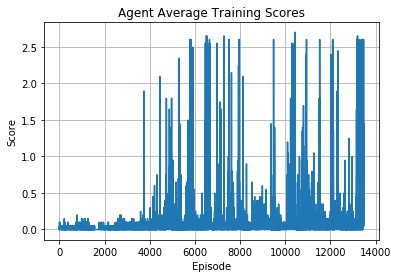

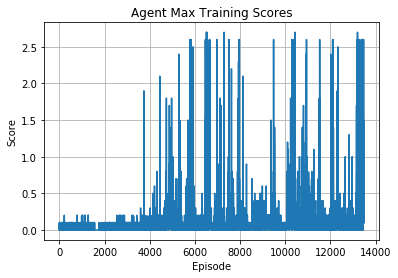

In [10]:
plt.plot(range(1, len(avg_scores) + 1), avg_scores)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.grid(True)
plt.title('Agent Average Training Scores')
plt.show()

plt.plot(range(1, len(max_scores) + 1), max_scores)
plt.xlabel('Episode')
plt.ylabel('Score')
plt.grid(True)
plt.title('Agent Max Training Scores')
plt.show()

# See it in action!
The next few cells can be optionally run to see the final version of the agents in action in a non training setting

---

# (optional) Load saved checkpoint from training
Run this next cell if you want to load alternately saved checkpoints from different training sessions

In [14]:
agents[0].d4.critic_local.load_state_dict(torch.load('critic_local.pth'))
agents[0].d4.critic_target.load_state_dict(torch.load('critic_target.pth'))
agents[0].d4.actor_local.load_state_dict(torch.load('actor_local.pth'))
agents[0].d4.actor_target.load_state_dict(torch.load('actor_target.pth'))

In [13]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)

time = 0
agents[0].d4.new_episode()
while time < 1000:
    agents[0].d4.next_timestep()
    time += 1
    actions = [agents[i].act(states[i]) for i in range(num_agents)]

    env_info = env.step(actions)[brain_name]

    next_states = env_info.vector_observations   
    rewards = env_info.rewards                   
    dones = env_info.local_done

    
    states = next_states
    scores = np.add(rewards, scores)

    if any(dones):
        break
print("Completed the episode with Avg Score: {}, Max Score: {}".format(np.mean(scores), np.max(scores)))

Completed the episode with Avg Score: 0.1450000023469329, Max Score: 0.20000000298023224


In [15]:
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)

time = 0
agents[0].d4.new_episode()
while time < 1000:
    agents[0].d4.next_timestep()
    time += 1
    actions = [agents[i].act(states[i]) for i in range(num_agents)]

    env_info = env.step(actions)[brain_name]

    next_states = env_info.vector_observations   
    rewards = env_info.rewards                   
    dones = env_info.local_done

    
    states = next_states
    scores = np.add(rewards, scores)

    if any(dones):
        break
print("Completed the episode with Avg Score: {}, Max Score: {}".format(np.mean(scores), np.max(scores)))

Completed the episode with Avg Score: 0.1450000023469329, Max Score: 0.20000000298023224


In [16]:
env.close()